In [125]:
from PIL import Image
from tqdm import trange

# Define the size of the square image
size = 512

# Create a new square image in RGB mode
image = Image.new("RGB", (size, size))

# Access the pixel data of the image
pixels = image.load()

# Loop over each pixel in the image
for y in range(size):
    for x in range(size):
        # Example: Set each pixel to a gradient color based on its position
        red = x * 255 // (3 * (size - 1))
        green = y * 255 // (15 * (size - 1))
        blue = (x + y) * 255 // (3 * (size - 1))
        pixels[x, y] = (red, green, blue)
# Save the resulting image
image.save("gradient_square.png")

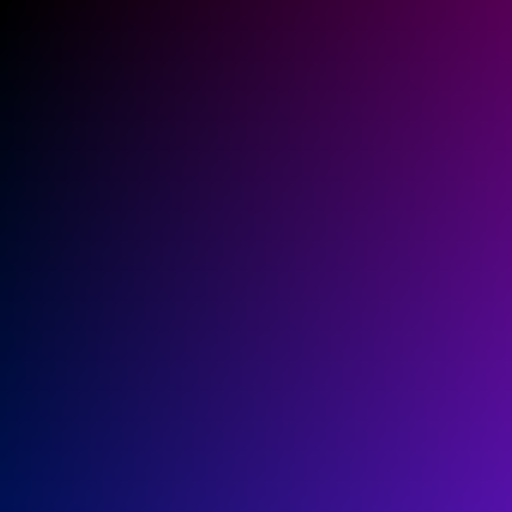

In [126]:
image

In [201]:
import math
from PIL import Image, ImageDraw
import os

# Define the size of the square image
size = 256
frames = []
num_frames = 60  # Number of frames in the animation

# Center of the image
center_x = size // 2
center_y = size // 2

# Parameter for the function r = sin(2 * theta * a)
a = 2  # Frequency of the sinusoidal pattern

# Maximum radius for the sinusoidal pattern
max_radius = size // 3

# Create an animation
for frame in range(num_frames):
    # Create a new square image in RGB mode
    image = Image.new("RGB", (size, size))
    pixels = image.load()

    # Create the gradient background
    for y in range(size):
        for x in range(size):
            red = x * 255 // (3 * (size - 1))
            green = y * 255 // (15 * (size - 1))
            blue = (x + y) * 255 // (3 * (size - 1))
            pixels[x, y] = (red, green, blue)

    # Overlay the sinusoidal pattern
    for x in range(size):
        for y in range(size):
            dx = x - center_x
            dy = y - center_y

            # Calculate the distance and angle from the center
            radius = math.sqrt(dx**2 + dy**2)
            theta = math.atan2(dy, dx)

            # Calculate r using the sinusoidal function with animation offset
            r = max_radius * math.sin(2 * theta * a + frame * 0.1)

            # If the pixel is within the radius defined by the function, overlay the pattern
            if abs(radius - abs(r)) < 2:  # Thickness of the pattern
                image.putpixel((x, y), (255, 255, 255))  # White color for the pattern

    # Append frame to the animation
    frames.append(image)

# Save the animation as a GIF
frames[0].save(
    "sinusoidal_pattern_animation.gif",
    save_all=True,
    append_images=frames[1:],
    duration=50,  # Frame duration in milliseconds
    loop=0
)

KeyboardInterrupt: 

In [1]:
from PIL import Image
from tqdm import trange
import numpy as np

# Define the size of the square image
size = 256
frames = []
num_frames = 1000  # Number of frames in the animation

# Create a new square image in RGB mode
image = Image.new("RGB", (size, size))

# Access the pixel data of the image
pixels = image.load()

# Create a meshgrid for vectorized computations
x = np.linspace(0, size - 1, size)
y = np.linspace(0, size - 1, size)
X, Y = np.meshgrid(x, y)

# Function to generate the gradient for each frame
def generate_frame(frame):
    red = (X * 255) // ((frame + 1) * (size - 1))
    green = (Y * 255) // ((frame + 15) * (size - 1))
    blue = ((X + Y) * 255) // ((frame + 3) * (size - 1))
    return np.stack([red, green, blue], axis=-1).astype(np.uint8)

for frame in range(num_frames):
    immagine = Image.fromarray(generate_frame(frame))
    # Append frame to the animation
    frames.append(immagine)

In [2]:

# Save the animation as a GIF
frames[0].save(
    "sinusoidal_pattern_animation.gif",
    save_all=True,
    append_images=frames,
    duration=50,  # Frame duration in milliseconds
    loop=1
)